In [42]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as ticker 
from sklearn.cluster import KMeans
from datetime import datetime
from pytz import timezone
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
import graphviz
from sklearn.neighbors import KNeighborsClassifier

In [43]:
data = pd.read_csv('/app/knight/Train_knight.csv')

data['knight'] = data['knight'].map({'Jedi': 1, 'Sith': 0})

trainAbilities = data[data.columns[:-1]]
trainKnight = data[data.columns[-1]]

abilitiesTrain, abilitiesTest, knightTrain, knightTest = train_test_split(trainAbilities, trainKnight, test_size=0.2)

In [44]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(trainAbilities, trainKnight)

KNeighborsClassifier(n_neighbors=4)

In [45]:
predKnight = neigh.predict(abilitiesTest)

print(predKnight)

[0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1
 0 0 1 0 0 1]


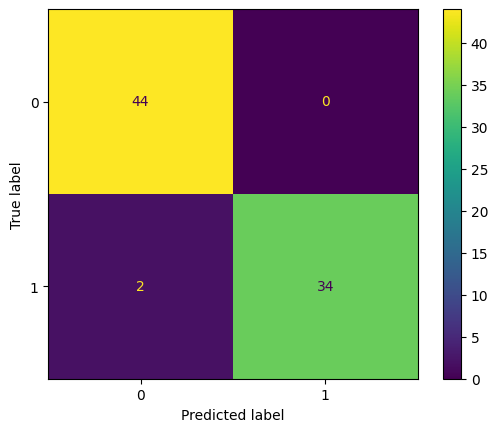

In [46]:
cm = confusion_matrix(knightTest, predKnight)

ConfusionMatrixDisplay(cm).plot()

In [47]:
accuracy = accuracy_score(knightTest, predKnight)
precision = precision_score(knightTest, predKnight)
recall = precision_score(knightTest, predKnight)

f_score = (2 * precision * recall) / (precision + recall)

print(f'precision: {round(precision * 100)}%')
print(f'recall: {round(recall * 100)}%')
print(f'accuracy: {round(accuracy * 100)}%')
print(f'f1-score: {round(f_score * 100)}%')

precision: 100%
recall: 100%
accuracy: 98%
f1-score: 100%


In [48]:
dataTest = pd.read_csv('/app/knight/Test_knight.csv')

In [49]:
result = neigh.predict(dataTest)

result = pd.DataFrame(result)
result[0] = result[0].map({0: 'Sith', 1: 'Jedi'})
   
result.to_csv('KNN.txt', index=False)

In [50]:
accuracyTab = []

for k in range(1, 30):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(trainAbilities, trainKnight)
    predKnight = neigh.predict(abilitiesTest)
    accuracyTab.append(accuracy_score(knightTest, predKnight))

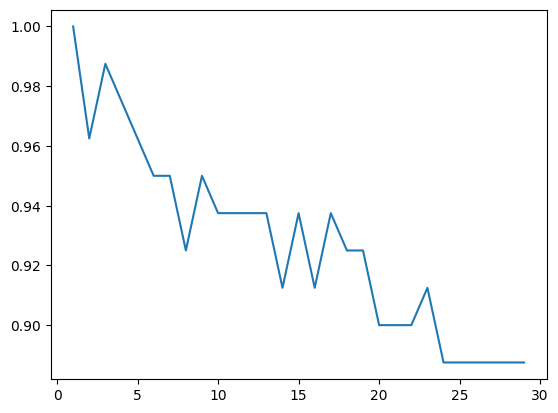

In [51]:
plt.plot(range(1, 30), accuracyTab)